**Objective:** Build a machine learning model to predict circuit failure based on temperature values, voltage values, and radiation measurements of different circuit components.

### Importing the Libraries

### Predicting Circuit Failure

In [1]:
# Suppress warnings from libraries, helps to keep the output clean by ignoring unnecessary warnings.
import warnings
warnings.filterwarnings('ignore')

# Importing pandas to work with dataframes
import pandas as pd

# MinMaxScaler is used to scale/normalize the features to a fixed range, usually [0,1].
from sklearn.preprocessing import MinMaxScaler 

# train_test_split is used to split the dataset into training and testing sets in a random manner.
# StratifiedKFold is used for k-fold cross-validation, preserving the percentage of samples for each class,
# making it useful for imbalanced datasets.
from sklearn.model_selection import train_test_split, StratifiedKFold

# PCA (Principal Component Analysis) is used for dimensionality reduction.
# It helps in reducing the number of features while retaining most of the variance.
from sklearn.decomposition import PCA

# Importing machine learning models for classification:
# RandomForestClassifier - an ensemble method that builds multiple decision trees and merges them.
# LogisticRegression - a simple linear model for binary classification problems.
# KNeighborsClassifier - a k-nearest neighbors classifier that classifies data points based on the majority class of neighbors.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Importing various evaluation metrics for model performance:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Matplotlib's pyplot is imported to create various types of visualizations such as plots and graphs.
from matplotlib import pyplot as plt


# 1. Exploratory Data Analysis


### Loading the data

In [2]:
df = pd.read_csv('dataset.csv')

### First 10 rows of the dataset

In [3]:
df.head(10)

,v1,v2,v3,v4,v5,t1,t2,annotation,radiation rate,timestamp
0,1.90,1.44,1.12,0.68,3.39,28.25,28.00,0,5137,1.580981e+09
1,1.78,1.29,1.00,0.71,3.37,27.25,27.50,0,5137,1.580981e+09
2,1.90,1.39,1.12,0.73,3.37,27.50,27.50,0,5137,1.580981e+09
3,1.78,1.29,1.12,0.68,3.39,27.75,27.75,0,5137,1.580981e+09
4,1.88,1.44,1.03,0.68,3.30,28.00,27.50,0,5137,1.580981e+09
5,1.78,1.34,1.00,0.71,3.37,28.00,28.25,0,5137,1.580981e+09
6,1.78,1.29,1.00,0.73,3.37,28.50,27.50,0,5137,1.580981e+09
7,1.83,1.39,1.05,0.71,3.37,28.00,28.00,0,5137,1.580981e+09
8,1.83,1.39,1.05,0.71,3.37,28.00,28.00,0,5137,1.580981e+09
9,1.83,1.39,1.03,0.73,3.34,28.00,28.00,0,5137,1.580981e+09


### Middle rows of the dataset

In [4]:
df.iloc[19557:19700]

,v1,v2,v3,v4,v5,t1,t2,annotation,radiation rate,timestamp
19557,1.98,1.44,1.22,0.66,3.59,51.50,44.75,0,16966,1.581070e+09
19558,1.78,1.51,1.17,1.22,3.66,51.50,44.75,0,16966,1.581070e+09
19559,2.03,1.54,1.10,0.71,3.56,51.75,44.75,0,16966,1.581070e+09
19560,1.88,1.39,1.00,0.61,3.39,51.75,44.75,1,16966,1.581070e+09
19561,2.12,1.66,1.00,0.66,3.59,51.75,45.00,1,16966,1.581070e+09
...,...,...,...,...,...,...,...,...,...,...
19695,2.03,1.54,1.10,0.85,3.66,54.25,49.75,1,16966,1.581071e+09
19696,2.00,1.54,1.10,0.66,3.96,54.25,49.75,1,16966,1.581071e+09
19697,2.12,1.71,1.32,0.93,4.00,54.25,49.75,1,16966,1.581071e+09
19698,2.10,1.71,1.10,0.93,3.81,54.25,50.00,1,16966,1.581071e+09


### Last 10 rows of the dataset

In [5]:
df.tail(10)

,v1,v2,v3,v4,v5,t1,t2,annotation,radiation rate,timestamp
19790,2.51,1.71,2.05,1.32,2.88,56.00,53.75,1,16966,1.581071e+09
19791,2.86,1.71,1.07,0.85,0.95,56.00,54.75,1,16966,1.581071e+09
19792,3.10,1.78,1.20,0.93,1.15,56.00,56.00,1,16966,1.581071e+09
19793,3.30,2.39,1.00,1.00,1.10,56.00,57.50,1,16966,1.581071e+09
19794,3.08,1.98,1.25,1.07,1.25,55.75,59.50,1,16966,1.581071e+09
19795,3.03,1.88,1.20,1.32,1.15,55.50,61.25,1,16966,1.581071e+09
19796,3.17,2.39,1.00,1.00,1.25,55.25,63.50,1,16966,1.581071e+09
19797,3.10,2.15,1.22,1.32,1.32,55.25,65.25,1,16966,1.581071e+09
19798,2.95,2.12,1.32,1.12,1.15,55.00,67.00,1,16966,1.581071e+09
19799,3.08,1.88,1.32,1.32,1.56,54.75,68.75,1,16966,1.581071e+09


### Information about the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19800 entries, 0 to 19799
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   v1              19800 non-null  float64
 1   v2              19800 non-null  float64
 2   v3              19800 non-null  float64
 3   v4              19800 non-null  float64
 4   v5              19800 non-null  float64
 5   t1              19800 non-null  float64
 6   t2              19800 non-null  float64
 7   annotation      19800 non-null  int64  
 8   radiation rate  19800 non-null  int64  
 9   timestamp       19800 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.5 MB


### Description of the dataset

In [7]:
df.describe()

,v1,v2,v3,v4,v5,t1,t2,annotation,radiation rate,timestamp
count,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,19800.000000,1.980000e+04
mean,1.957821,1.511976,1.139565,0.805223,3.535615,55.420707,36.689836,0.060606,2966.148636,1.580998e+09
std,0.145718,0.132226,0.136562,0.134275,0.183454,9.052779,3.909734,0.238612,3322.785238,2.437355e+04
min,1.760000,1.100000,0.660000,0.460000,0.950000,24.000000,26.750000,0.000000,1209.000000,1.580981e+09
25%,1.880000,1.420000,1.050000,0.710000,3.390000,50.250000,34.750000,0.000000,1209.000000,1.580987e+09
50%,1.900000,1.460000,1.120000,0.810000,3.520000,56.000000,36.000000,0.000000,1209.000000,1.580991e+09
75%,2.030000,1.590000,1.220000,0.880000,3.660000,61.250000,37.500000,0.000000,2469.000000,1.580994e+09
max,3.300000,2.390000,2.050000,1.320000,4.080000,72.250000,68.750000,1.000000,16966.000000,1.581071e+09


### Check for missing values

In [8]:
df.isnull().sum()

v1                0
v2                0
v3                0
v4                0
v5                0
t1                0
t2                0
annotation        0
radiation rate    0
timestamp         0
dtype: int64

### Value Count in annotation column

In [9]:
df['annotation'].value_counts()

annotation
0    18600
1     1200
Name: count, dtype: int64

### Percentage of each value in annotation column

In [10]:
df['annotation'].value_counts(normalize=True)

annotation
0    0.939394
1    0.060606
Name: proportion, dtype: float64

### Columns in the dataset

In [11]:
df.columns

Index(['v1', 'v2', 'v3', 'v4', 'v5', 't1', 't2', 'annotation',
       'radiation rate', 'timestamp'],
      dtype='object')

### Shape of the dataset

In [12]:
df.shape

(19800, 10)

### Convert timestamp column to datetime and set it as index

It is useful to have the time (or timestamp) as the index since It allows selecting data over specific time periods (e.g., hourly, daily, monthly,  analysis) and for easier slicing.

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# use only the time part of the timestamp
# df['timestamp'] = df['timestamp']
df.set_index('timestamp', inplace=True)

In [14]:
df.head(10)

,v1,v2,v3,v4,v5,t1,t2,annotation,radiation rate
timestamp,,,,,,,,,
1970-01-19 07:09:41.470970360,1.90,1.44,1.12,0.68,3.39,28.25,28.00,0,5137
1970-01-19 07:09:41.473216010,1.78,1.29,1.00,0.71,3.37,27.25,27.50,0,5137
1970-01-19 07:09:41.473854900,1.90,1.39,1.12,0.73,3.37,27.50,27.50,0,5137
1970-01-19 07:09:41.474493870,1.78,1.29,1.12,0.68,3.39,27.75,27.75,0,5137
1970-01-19 07:09:41.475128740,1.88,1.44,1.03,0.68,3.30,28.00,27.50,0,5137
1970-01-19 07:09:41.475767690,1.78,1.34,1.00,0.71,3.37,28.00,28.25,0,5137
1970-01-19 07:09:41.476406590,1.78,1.29,1.00,0.73,3.37,28.50,27.50,0,5137
1970-01-19 07:09:41.477041480,1.83,1.39,1.05,0.71,3.37,28.00,28.00,0,5137
1970-01-19 07:09:41.477680390,1.83,1.39,1.05,0.71,3.37,28.00,28.00,0,5137


In [15]:
df.tail()

,v1,v2,v3,v4,v5,t1,t2,annotation,radiation rate
timestamp,,,,,,,,,
1970-01-19 07:11:10.605348320,3.03,1.88,1.20,1.32,1.15,55.50,61.25,1,16966
1970-01-19 07:11:10.605987480,3.17,2.39,1.00,1.00,1.25,55.25,63.50,1,16966
1970-01-19 07:11:10.606626130,3.10,2.15,1.22,1.32,1.32,55.25,65.25,1,16966
1970-01-19 07:11:10.607261040,2.95,2.12,1.32,1.12,1.15,55.00,67.00,1,16966
1970-01-19 07:11:10.607900390,3.08,1.88,1.32,1.32,1.56,54.75,68.75,1,16966


### Distribution of every feature

For visualizing the distribution of numerical data in the DataFrame, which helps identify patterns, skewness, or outliers.

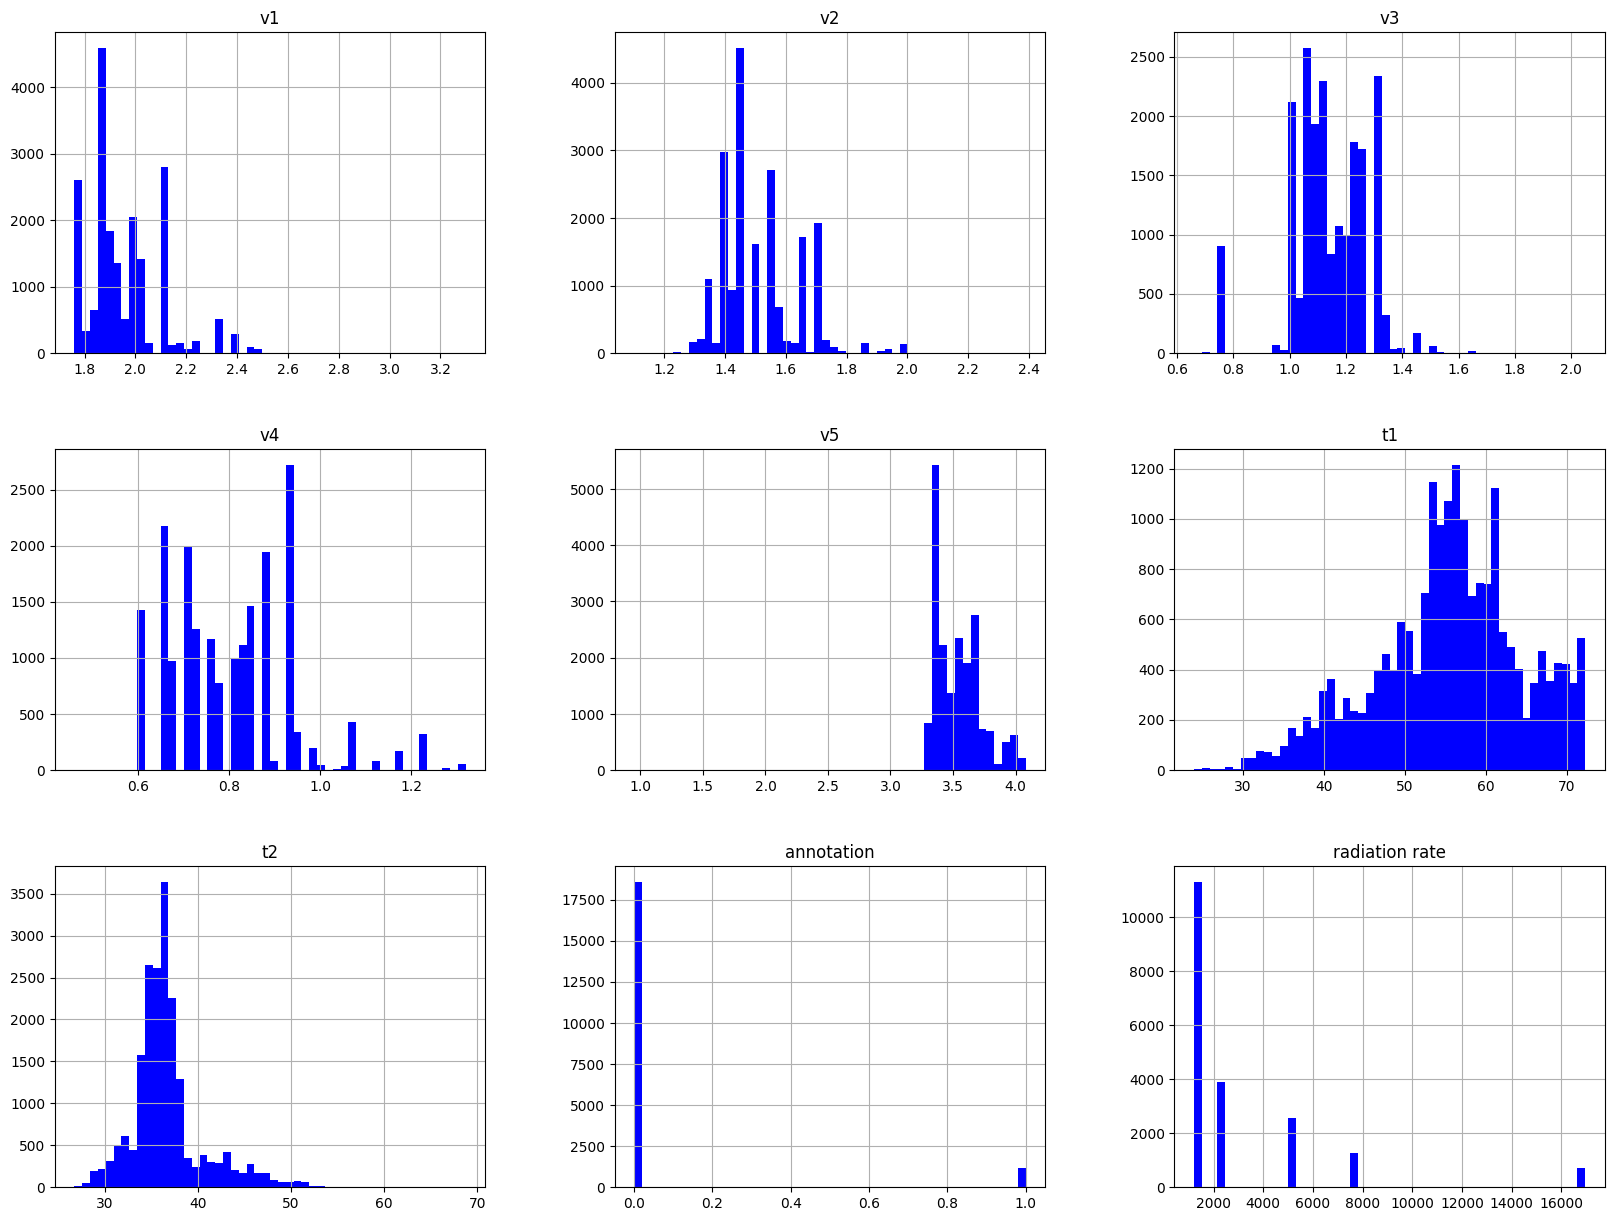

In [16]:
# Generate histograms for all numerical columns in the DataFrame 'df'
df.hist(bins=50, figsize=(20,15), color='blue')
plt.show()

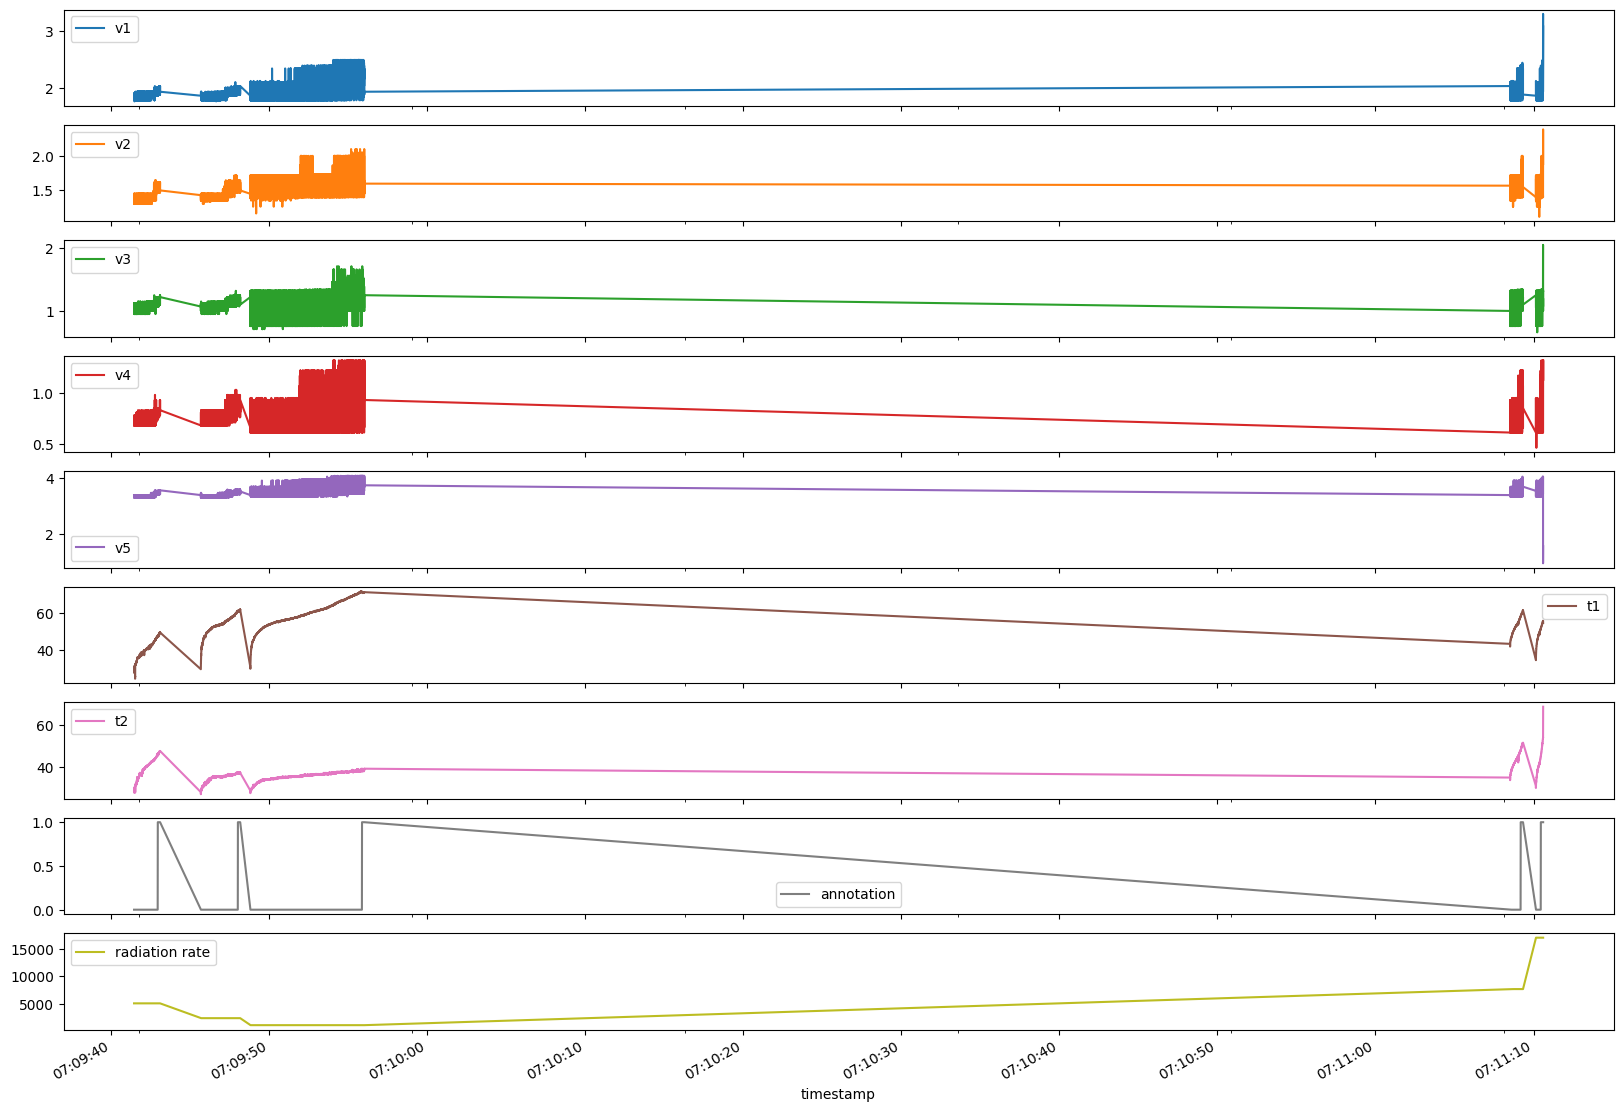

In [17]:
# plot the distribution of every feature
df.plot(subplots=True, figsize=(20,15))
plt.show()

In [18]:
# Get rows from '1970-01-19 07:10:00' to '1970-01-19 07:11:00'
df['1970-01-19 07:10:00':'1970-01-19 07:11:00']

,v1,v2,v3,v4,v5,t1,t2,annotation,radiation rate
timestamp,,,,,,,,,


# 2. Data Preprocessing

### Splitting the dataset

The purpose of splitting the dataset into training and testing sets is to evaluate the model's performance on unseen data. By doing this, we can ensure that the model generalizes well to new data rather than simply memorizing the training data (overfitting).

**Training Set:** Used to train the model by adjusting its parameters based on the input data and corresponding labels.

**Testing Set:** This is a subset of the data that the model has never seen during training. It allows us to objectively evaluate the model's performance on data that it wasn't trained on.

In [19]:
# Split the dataset into features (X) and target (y), with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('annotation', axis=1),  # Features (all columns except 'annotation')
    df['annotation'],               # Target variable ('annotation')
    test_size=0.2,                  # Test set is 20% of the dataset
    random_state=42                 # Ensures the same random split every time for reproducibility
)


In [20]:
# Initialize StratifiedKFold with 5 splits to preserve class distribution in each fold.
skf = StratifiedKFold(n_splits=5)


Why Scaling/Normalization is Needed: Many machine learning algorithms, such as k-nearest neighbors, support vector machines, and neural networks, perform better when the features are scaled to a similar range. Otherwise, features with larger values could dominate the model's calculations

In [21]:
# Initialize MinMaxScaler to scale features to a range [0, 1].
scaler = MinMaxScaler()

# Fit the scaler on X_train and transform it.
X_train = scaler.fit_transform(X_train)

# Apply the same transformation to X_test (using the fitted scaler from X_train).
X_test = scaler.transform(X_test)

### Encoding categorical column

Categorical data is the data that generally takes a limited number of possible values. These values represent different categories or groups. The categorical data can be divided into two types: Nominal and Ordinal data.
Nominal data is the data that has two or more categories, but which do not have an intrinsic order. For example,
- The type of car.
- The city of residence.
- The color of a car.

Ordinal data is the data that has two or more categories with a clear ordering. For example,
- Star rating.
- Education level.
- Income level.

In our dataset the annotation column contains 0s and 1s hence there is no need to encode the column.
The rest of the columns are numerical columns.


# 3. Feature Selection

### Using PCA for feature selection

In [22]:
# PCA
pca = PCA(n_components=8)

principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['v1', 'v2', 'v3', 'v4', 'v5', 't1', 't2', 'radiation_rate'])

### Explained Variance
Explained Variance is the proportion to which each principal component explains the variance of the data. It is important to know how much information is retained by the principal components. The explained variance is calculated using the explained_variance_ratio_ attribute of the PCA object.

In [23]:
# Explained Variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.43693911, 0.25888924, 0.1221186 , 0.0554861 , 0.04578219,
       0.04025464, 0.02674441, 0.01378571])

### Eigenvalues
Eigenvalues are the values that represent how much variance is present in the dataset. The eigenvalues are the values that are used to determine the number of principal components to be selected. The eigenvalues are calculated using the eigenvectors of the covariance matrix of the dataset.

In [24]:
# Eigenvalues
pca.explained_variance_

array([0.06411326, 0.03798752, 0.01791879, 0.00814163, 0.00671774,
       0.00590667, 0.00392428, 0.00202282])

# 4. Model Building

### Random Forest Classifier

In [25]:
rf = RandomForestClassifier(class_weight='balanced')
rf_accuracy = []
rf_f1 = []
rf_precision = []
rf_recall = []

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    rf.fit(X_train_fold, y_train_fold)
    y_pred = rf.predict(X_val_fold)
    rf_accuracy.append(accuracy_score(y_val_fold, y_pred))
    rf_f1.append(f1_score(y_val_fold, y_pred))
    rf_precision.append(precision_score(y_val_fold, y_pred))
    rf_recall.append(recall_score(y_val_fold, y_pred))

print('Random Forest')
Accuracy = sum(rf_accuracy)/len(rf_accuracy)
F1_Score = sum(rf_f1)/len(rf_f1)
Precision = sum(rf_precision)/len(rf_precision)
Recall = sum(rf_recall)/len(rf_recall)

rf_results =  pd.DataFrame(['Random Forecast', Accuracy, F1_Score, Precision, Recall]).transpose()
rf_results.columns = ['Algorithm','Accuracy', 'F1 Score', 'Precision', 'Recall']
rf_results


Random Forest


,Algorithm,Accuracy,F1 Score,Precision,Recall
0,Random Forecast,0.991225,0.927768,0.934194,0.921575


### Logistic Regression

In [26]:
lr = LogisticRegression()

lr_accuracy = []
lr_f1 = []
lr_precision = []
lr_recall = []

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    lr.fit(X_train_fold, y_train_fold)
    y_pred = lr.predict(X_val_fold)
    lr_accuracy.append(accuracy_score(y_val_fold, y_pred))
    lr_f1.append(f1_score(y_val_fold, y_pred))
    lr_precision.append(precision_score(y_val_fold, y_pred))
    lr_recall.append(recall_score(y_val_fold, y_pred))
    
print('Logistic Regression')
Accuracy = sum(lr_accuracy)/len(lr_accuracy)
F1_Score = sum(lr_f1)/len(lr_f1)
Precision = sum(lr_precision)/len(lr_precision)
Recall = sum(lr_recall)/len(lr_recall)
lr_results =  pd.DataFrame(['Logistic Regression', Accuracy, F1_Score, Precision, Recall]).transpose()
lr_results.columns = ['Algorithm','Accuracy', 'F1 Score', 'Precision', 'Recall']
lr_results

Logistic Regression


,Algorithm,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.95625,0.507876,0.813137,0.369441


### K Nearest Neighbors

In [27]:
knn = KNeighborsClassifier()

knn_accuracy = []
knn_f1 = []
knn_precision = []
knn_recall = []

for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
    knn.fit(X_train_fold, y_train_fold)
    y_pred = knn.predict(X_val_fold)
    knn_accuracy.append(accuracy_score(y_val_fold, y_pred))
    knn_f1.append(f1_score(y_val_fold, y_pred))
    knn_precision.append(precision_score(y_val_fold, y_pred))
    knn_recall.append(recall_score(y_val_fold, y_pred))
    
print('K Nearest Neighbors')
Accuracy = sum(knn_accuracy)/len(knn_accuracy)
F1_Score = sum(knn_f1)/len(knn_f1)
Precision = sum(knn_precision)/len(knn_precision)
Recall = sum(knn_recall)/len(knn_recall)
knn_results =  pd.DataFrame(['K Nearest Neighbors', Accuracy, F1_Score, Precision, Recall]).transpose()
knn_results.columns = ['Algorithm','Accuracy', 'F1 Score', 'Precision', 'Recall']
knn_results


K Nearest Neighbors


,Algorithm,Accuracy,F1 Score,Precision,Recall
0,K Nearest Neighbors,0.973801,0.765366,0.846936,0.698633


# 5. Model Evaluation

## Models Accuracy, F1 Score, Precision and Recall

**Accuracy** is the proportion of correctly predicted instances (both positive and negative) out of the total predictions.
$$ \textbf{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} $$

**Precision** is the proportion of correct positive predictions out of all the instances that were predicted as positive.
$$ \textbf{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

**Recall (or sensitivity)** is the proportion of correct positive predictions out of all the actual positive instances.
$$ \textbf{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

**F1 Score** is the harmonic mean of precision and recall, providing a balance between the two.
$$ \textbf{F1\ Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$


### 1. Random Forest Performance on Test Dataset

In [28]:
y_pred = rf.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
rf_results_test =  pd.DataFrame(['Random Forest', Accuracy, F1_Score, Precision, Recall]).transpose()
rf_results_test.columns = ['Algorithm','Accuracy', 'F1 Score', 'Precision', 'Recall']
rf_results_test

,Algorithm,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.994697,0.954839,0.948718,0.961039


### 2. Logistic Regression Performance on Test Dataset

In [29]:
y_pred = lr.predict(X_test)
Accuracy = accuracy_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
lr_results_test =  pd.DataFrame(['Logistic Regression', Accuracy, F1_Score, Precision, Recall]).transpose()
lr_results_test.columns = ['Algorithm','Accuracy', 'F1 Score', 'Precision', 'Recall']
lr_results_test

,Algorithm,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.958586,0.508982,0.825243,0.367965


### 3. K Nearest Neigbors Performance on Test Dataset

In [30]:
y_pred = knn.predict(X_test)
Accuracy =  accuracy_score(y_test, y_pred)
F1_Score = f1_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
knn_results_test =  pd.DataFrame(['K Nearest neighbors', Accuracy, F1_Score, Precision, Recall]).transpose()
knn_results_test.columns = ['Algorithm','Accuracy', 'F1 Score', 'Precision', 'Recall']
knn_results_test

,Algorithm,Accuracy,F1 Score,Precision,Recall
0,K Nearest neighbors,0.978283,0.804545,0.84689,0.766234


### Models Comparison

In [31]:
print("     PERFORMANCE OF DIFFERENT MODELS ON TEST DATA SET")
# Concatenate the dataframes
df_models = pd.concat([rf_results_test,knn_results_test,lr_results_test], axis=0) 

#Reset the index and drop the old index
df_models.reset_index(drop=True, inplace=True)

#Display the results
df_models


     PERFORMANCE OF DIFFERENT MODELS ON TEST DATA SET


,Algorithm,Accuracy,F1 Score,Precision,Recall
0,Random Forest,0.994697,0.954839,0.948718,0.961039
1,K Nearest neighbors,0.978283,0.804545,0.84689,0.766234
2,Logistic Regression,0.958586,0.508982,0.825243,0.367965


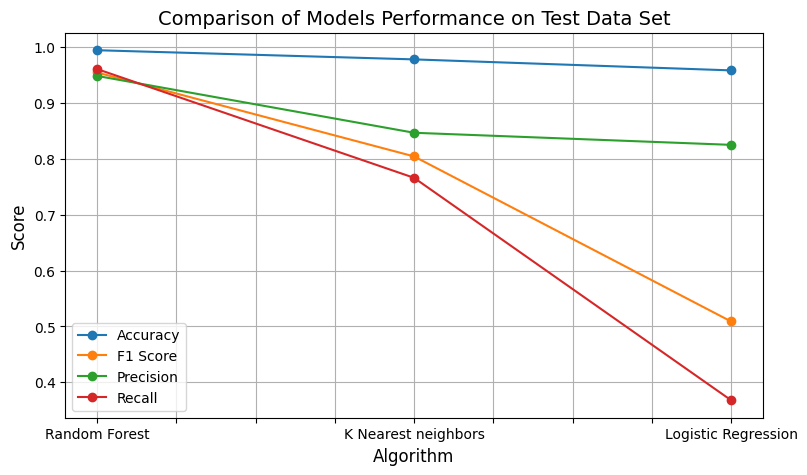

In [32]:
# Set index to 'Algorithm' for better visualization
df_models.set_index('Algorithm', inplace=True)

# Plotting the metrics (Accuracy, F1 Score, Precision, Recall) for each model
df_models.plot(kind='line', marker='o', figsize=(9,5))

# Adding title and labels
plt.title('Comparison of Models Performance on Test Data Set', fontsize=14)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Metric', fontsize=12)

# Display the plot with grid
plt.grid(True)
plt.show()


In this project, where circuit failure is a critical issue, the primary focus should be on **recall** to ensure that the model is highly sensitive in detecting failures. While the **F1-Score** provides a balance between recall and precision, minimizing **false negatives** (missed failures) is more important than minimizing **false positives** (false alarms). This approach helps predict failures in a timely manner, reducing the risk of undetected critical failures.

The **Random Forest** model emerges as the best performer with a recall of **95.67%**, indicating that it successfully detects most circuit failures. This aligns well with the project’s goal of preventing dangerous failures by providing both high sensitivity and a good balance between precision and recall.

On the other hand, while **K-Nearest Neighbors (KNN)** performs adequately in terms of accuracy and precision, its lower recall of **76.62%** makes it less effective in identifying all failures. This limitation could lead to missed failure predictions, which poses a risk in this context.

Finally, from the observed metrics, the **Logistic Regression** model proves unsuitable for this project. Its **low recall** means it fails to detect the majority of failures, making it a risky option for predicting dangerous circuit issues.


# 6. Model Interpretation

### Factors Influencing the Model's Predictions


  - **Feature Importance**: Voltage readings (V1, V2, V3, V4, V5), temperature values (T1, T2), and radiation rate strongly influence the model. Deviations from expected voltage and high temperatures, especially under high radiation rates, are key predictors of failure.
  - **Interactions Between Features**: Combined effects of voltage, temperature, and radiation significantly impact the failure risk.
  - **Imbalanced Data**: More "OK" instances than failures can bias the model toward predicting non-failures, affecting its ability to detect failures.

### Challenges Encountered During the Modelling Process

  - **Class Imbalance**: The majority of non-failure instances can lead to poor recall for failures. Addressed using **class weighting**.
  - **Feature Scaling**: Different scales for voltage, temperature, and radiation required **scaling** (MinMaxScaler) to ensure equal feature contribution.

